#### XGBoost

1. speed and performance
2. core parallelization
3. outperforms single algorithm methods. 

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
churn_data = pd.read_csv("churn_data.csv")
print("chrun data shape - ",churn_data.shape)
display(churn_data.head())

chrun data shape -  (14999, 10)


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
y = churn_data[["churn"]]
X = churn_data.drop(["churn"], axis = 1 )

In [8]:
print("churn value counts  - \n",churn_data.churn.value_counts())

print("\n\nunique of departments - ",churn_data.department.unique())

print("\n\nunique of departments - ",churn_data.salary.unique())

print("\n\ndtypes of churn data - \n", churn_data.dtypes)

churn value counts  - 
 0    11428
1     3571
Name: churn, dtype: int64


unique of departments -  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


unique of departments -  ['low' 'medium' 'high']


dtypes of churn data - 
 satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours      int64
time_spend_company        int64
work_accident             int64
churn                     int64
promotion                 int64
department               object
salary                   object
dtype: object


xgbBoost needs [encoding](http://appliedpredictivemodeling.com/blog/2013/10/23/the-basics-of-encoding-categorical-data-for-predictive-models). xgboost only deals with numeric columns. Using __LIGHTLBM__ or __CATBOOST__ ```categorical_features``` column takes all the categorical variables<br>
[```pandas.get_dummies()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [23]:
categorical_variables = []
## convert categorical variables into one hot encoding 
for col , dtype in zip(X.columns, X.dtypes):
    if dtype == object :
        categorical_variables.append(col)
        ## append s list of categorical variables
        
for columns in categorical_variables:
    ## get dummies
    cat_var_dummies = pd.get_dummies(X[columns], prefix= columns, dummy_na=True)
    
    ## get_dummies ignore Nan rows while getting dummes
    
    print(X[columns].isna().any())
    X.drop([columns], axis = 1 , inplace = True)
    
    for cols in cat_var_dummies.columns:
        X[cols] = cat_var_dummies[cols]

False
False


-- XG boost check the variables and see for categorical ones

In [10]:
X.head(1)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department_IT,department_RandD,department_accounting,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,department_nan,salary_high,salary_low,salary_medium,salary_nan
0,0.38,0.53,2,157,3,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


[n_estimators for scikit learn API or num_boost_round](https://stackoverflow.com/questions/46234806/what-n-estimators-and-max-features-means-in-randomforestregressor/46234913) [[1]](https://stackoverflow.com/questions/48051749/what-is-the-difference-between-num-boost-round-and-n-estimators)<br>
[max_features](https://stackoverflow.com/questions/23939750/understanding-max-features-parameter-in-randomforestregressor/23950648#23950648)<br>
[objective and feval in XGB](https://stackoverflow.com/questions/34178287/difference-between-objective-and-feval-in-xgboost)<br>
[weight of evidence and information value](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)<br>
[gamma](https://www.kaggle.com/c/santander-customer-satisfaction/discussion/20662)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 40, test_size = 0.2)

xg_cl = xgb.XGBClassifier(objective = "binary:logistic",
                          n_estimators = 10,
                          seed = 123,
                          verbosity = 3)
xg_cl.fit (X_train, y_train )

pred = xg_cl.predict(X_test)

accuracy = float(np.sum(pred==y_test.churn.to_numpy()))/y_test.shape[0]
display(accuracy)

[00:12:42] ======== Monitor: Learner ========
[00:12:42] GetGradient: 0.0156225s, 10 calls @ 1562us
[00:12:42] PredictRaw: 0.0024187s, 10 calls @ 241us
[00:12:42] UpdateOneIter: 0.197145s, 10 calls @ 19714us
[00:12:42] ======== Monitor: GBTree ========
[00:12:42] BoostNewTrees: 0.179103s, 10 calls @ 17910us
[00:12:42] CommitModel: 0s, 10 calls @ 0us
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree prunin

C:\Users\chris.aloysious\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chris.aloysious\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[00:12:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


0.966

[Feature Importance](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/) using xgbClassifer. <br>
Learning Rate and # of trees needs to managed according, if high learning rate, then trees need to be more else vice versa

In [35]:
xg_cl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=3)

In [36]:
xg_cl.feature_importances_

array([0.43546143, 0.13948922, 0.16830975, 0.05355989, 0.20317967,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ], dtype=float32)

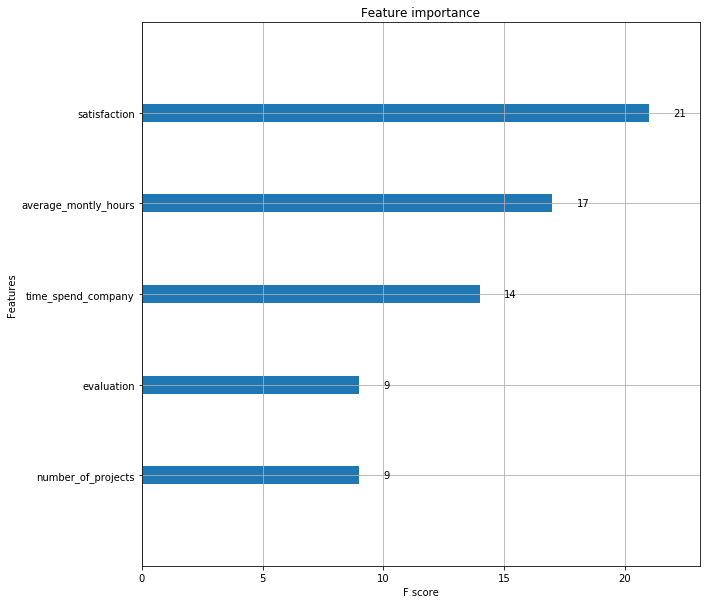

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(xg_cl, ax = ax)
plt.show()

In [24]:
# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
## accuracy metric 
## y_test.churn.to_numpy() makes an array as in  -- array[()]
accuracy = float(np.sum(y_pred_4==y_test.churn.to_numpy()))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.968


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_clf_4.predict(X_test))) #  target_names=target_names

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.94      0.92      0.93       709

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [41]:
## xgboost package matrix - it works best on sparse matrix. 

churn_dmatrix = xgb.DMatrix( data  = X , 
                             label = y)

params = {"objective":"binary:logistic", "max_depth":4}

cv_results = xgb.cv(dtrain = churn_dmatrix, 
                   params = params,  ## params dictionary
                   nfold = 4, ## cross validation metric 
                   num_boost_round = 10, ## trees to build
                   metrics = "error", ## evaluation metrics
                   as_pandas = True )

print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.030580         0.000403         0.033069        0.001321
1          0.026535         0.001432         0.028668        0.000609
2          0.027935         0.002434         0.028935        0.002887
3          0.025935         0.000317         0.026935        0.000964
4          0.027224         0.001442         0.028402        0.000717
5          0.026380         0.000667         0.027668        0.000479
6          0.026402         0.000778         0.027535        0.000513
7          0.026602         0.000889         0.027202        0.000599
8          0.025312         0.000758         0.026469        0.000952
9          0.025335         0.000793         0.026402        0.000964
0.973598


-- when to use xgboost?
-- large # of dataset 
-- # feature < # sample 
-- categorical or numerical features or just numerical features. 

-- when not to use ? 
-- image recognition/computer vision/ nlp
-- # feature > # sample 
-- xyz 

-- question 
XGBoost is a powerful library that scales very well to many samples and works for a variety of supervised learning problems. That said, as Sergey described in the video, you shouldn't always pick it as your default machine learning library when starting a new project, since there are some situations in which it is not the best option. In this exercise, your job is to consider the below examples and select the one which would be the best use of XGBoost.
-- xyz predicting clicks and buys 

1. What are the accuracy metrics

-- confusion matrix 
n*n matric where n is the class to be predicted. ACCURACY/ERROR/SENSITIVITY/SPECIFICITY/
sensitivity or recall here will have to focus on one problem either sensitivity or specificity
recall - of pos / all pos 
precision or pos/ all model predicted positive 
here it is case sensitive 
specificity proportion of negative values corretly identified. 
f1 score is the harmonic mean of recall and precision 2(p.r)/(p+r) Why F1 is HM and not AM(arithmatic mean) because HM punishes extreme values, say p = 0 and r = 1 then HM = 0, when precision is 0 meaning the model is useless. 

ROC = sensitivity vs (1-specificity) (1-specificity) is called false positive rate

Will need examples here - like where which metric is needed, which case is it ?

Log Loss - AUC ROC it does not take into account the model’s capability to predict higher probability for samples more likely to be positive. meaning probability positive can be 51 or 78 so log loss takes this difference into consideration. 


|parameter|Gradient boost|[XG boost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)|
|---|---|---|
|Parameter estimation|The gradient is used to minimize the loss function (error - difference between the actual values and predicted values). It is basically the partial derivative of the loss function, so it describes the steepness of our error function. |XGBoost stands for Extreme Gradient Boosting. XGBoost is a specific implementation of the Gradient Boosting method which delivers more accurate approximations by using the strengths of second order derivative of the loss function, L1 and L2 regularization and parallel computing.|
|Algorithm|In each round of training, the weak learner is built and its predicted values are compared to the actual values. The distance or difference between the prediction and reality represents the error rate of our model.|XGBoost computes second-order gradients, i.e. second partial derivatives of the loss function, which provides more information about the direction of gradients and how to get to the minimum of our loss function.|
|missing values|no|yes|
|regularization|no|xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.|

|parameter|Adaboost|Gradient boost|
|---|---|---|
||Adaboost makes a stump and the AOS of the next tree is based on the current tree errors - so the tree next made are taking into consideration the errors of previous trees etc etc till there is perfect fit or that we say ki ok end it| In contrast Gradint boost makes a initial guess, for regression it is the mean value - so the first treee is actually a leaf|
|stumps|single not more it is a stump thats all| but GB makes a tree of say 8 to 32 leaves usually|

> Speed and performance and can run in parallel

##### xgbRegressor

In [18]:
from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)
x_train,x_test,  y_train , y_test = train_test_split(X, y, random_state = 40)


cgb_cl = xgb.XGBRegressor( n_estimators = 10, seed = 123, objective = 'reg:squarederror')
display(x_train.shape)
display(y_train.shape)
## sklearn classifier get ValueError: bad input shape
## shape not matching
cgb_cl.fit(x_train, y_train)
cgb_cl.predict(x_test)

(331, 10)

(331,)

array([ 56.8048  , 100.20036 , 117.93829 , 117.93829 , 116.96602 ,
       115.78438 , 110.49217 ,  56.8048  , 108.52645 ,  88.80094 ,
       118.17051 ,  68.532295,  53.892273, 114.68697 ,  65.05115 ,
       121.31471 ,  90.100876,  56.8048  ,  60.50561 ,  95.792305,
        50.19146 , 151.91193 ,  92.06789 ,  58.895   ,  65.05115 ,
       119.36126 , 107.01967 ,  56.8048  ,  88.80094 ,  56.8048  ,
       107.01967 ,  88.80094 ,  64.83148 , 129.92712 ,  57.02446 ,
        53.323647,  56.8048  ,  53.323647, 111.64564 ,  70.93317 ,
        90.100876,  50.19146 ,  56.8048  , 101.33838 , 116.96602 ,
        67.23235 ,  56.8048  ,  97.10546 ,  67.23235 , 146.41388 ,
       151.00188 , 116.96602 , 151.00188 , 127.390594,  56.8048  ,
       156.74522 ,  92.06789 , 100.4243  ,  56.8048  ,  92.50175 ,
       101.33838 ,  55.194187, 125.00076 , 131.59715 , 126.37818 ,
        56.8048  , 125.686935, 143.31319 ,  95.792305, 120.85364 ,
       120.05889 , 105.57465 ,  56.8048  , 121.31471 , 168.082

In [19]:
## regression metric
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("mean absolute error ",mean_absolute_error(y_test, cgb_cl.predict(x_test)))

print("mean squared error ",mean_squared_error  (y_test, cgb_cl.predict(x_test)))

print("R2 score ",                     r2_score (y_test, cgb_cl.predict(x_test)))

mean absolute error  73.67035726598792
mean squared error  8959.978148219954
R2 score  -0.35474359607908434


>xgboost used CART Trees, where each leaf is a real value then there is threhold, <br>
>boosting is an ensemble meta algorithm that is used to convert weak learners to strong learner<br>
> [Multi-colieanrty removed](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py)<br>
>

In [26]:
from sklearn.datasets import load_breast_cancer

X, y  = load_breast_cancer(return_X_y = True)

x_train,x_test,  y_train , y_test = train_test_split(X, y, random_state = 40)
cgb_cl = xgb.XGBClassifier( n_estimators = 10, seed = 123, objective = "binary:logistic")
display(x_train.shape)
display(y_train.shape)
## sklearn classifier get ValueError: bad input shape
## shape not matching
cgb_cl.fit(x_train, y_train)
cgb_cl.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, cgb_cl.predict(x_test))) #  target_names=target_names

(426, 30)

(426,)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.98      0.96      0.97        98

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



When not to use xgboost?
>image recognition, computer vision, NLP, 

xgboost objective function and base learners

loss functions:
binary:logistic  - when u want the probability
reg:linear - for linear
reg:logistic - when u want the output

[when using CV for multiclass problem set an extra param ```num_class```](https://stackoverflow.com/questions/40116215/xgboost-sklearn-wrapper-value-0for-parameter-num-class-should-be-greater-equal-t)